# MIT 6.006 Introduction To Algorithms Course

## Finding A Two-Dimensional Peak

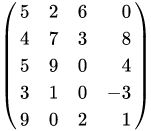

A two-dimensional peak is an element in a matrix (A[i][j]) which is greater than the elements A[i+1][j], A[i-1][j], A[i][j+1] and A[i][j-1].

In the example above the element 9 is an example of a peak in the matrix.

The algorithm below finds a two-dimensional peak if it exists in O(n logm) time complexity. Where n is the number of rows and m is the number of columns in the matrix.

In [153]:
import sys

from math import floor

"""
Returns the global maximum for the given column.
"""
def find_global_maximum(matrix, num_rows, num_cols,j):
    maximum = -sys.maxsize
    maxIndex = 0
    
    # Iterate of the jth column
    for i in range(num_rows):
        if (maximum < matrix[i][j]):
            maxIndex = i
            maximum = matrix[i][j]
        
    return maxIndex  


"""
Given a global maxima for a column 
the function returns the coordinates of the peak.
"""
def find_peak(matrix, num_rows, start_col, end_col):
    num_cols = (end_col - start_col) + 1
    middle = floor(start_col + num_cols / 2)
    
    maxRow = find_global_maximum(matrix, num_rows, num_cols, middle)

    if (num_rows == 1):
        return (maxRow, middle)
    
    # Determine the peak in the matrix
    if (middle != 0):
        if (matrix[maxRow][middle-1] > matrix[maxRow][middle]):
            return find_peak(matrix, num_rows, start_col, middle - 1)    
    
    if (middle != end_col):
        if (matrix[maxRow][middle + 1] > matrix[maxRow][middle]):
            return find_peak(matrix, num_rows, middle + 1, end_col)
        
    return (maxRow, middle)      
        
    

matrix = [[1,2,2,6], [7, 8, 50000, 10], [1, 5, 9000, 10000], [18, 20, 4333333, 19]]
print(find_peak(matrix, 4, 0, 3)) 

(3, 2)


## Computing Document Distance

The program below computes the distance between two strings. 

The algorithm works as follows:

1. Splits the document into words.
2. Counts the word frequencies to produce word vectors.
3. We then find the dot product of the two documents and normalize the result to find the distance between the two documents.

A document distance of 0 means the two documents are identical.

![document distance](https://www.andrew.cmu.edu/course/15-121/labs/HW-4%20Document%20Distance/pix1.bmp)

Above is the formula to compute the distance between two documents.

This algorithm can be used in natural language processing.

In [11]:
from collections import defaultdict
from math import acos
from math import sqrt
import re

"""
Returns a dictionary of the frequency
of words in a dictionary
"""
def count_words(document):
    document = document.lower()
    
    # Remove anything that is not in the alphabet
    document = re.sub(r'[^a-z ]', '', document)
    
    # Split the document into constituent words
    words = document.split()
    
    """ 
    Create a default dictionary where each element
    has a default value of 0.
    """
    wordDict = defaultdict(lambda: 0)
    
    for word in words: 
        wordDict[word]+=1
        
    
    return wordDict


"""
Calculates the magnitude of a dictionary.
"""
def vector_magnitude(doc):
    sum_doc = 0
    for value in doc.values():
        sum_doc += value ** 2
    
    return sum_doc
        
"""
Returns the dot cosine simmilarity 
of two strings.
"""
def dot_product(s1, s2):
    dict1 = count_words(s1)
    dict2 = count_words(s2)
    
    
    # Compute the dot product of both dictionaries.
    set_dict = set(dict1.keys()).union(set(dict2.keys()))
    
    sum_dict = 0
    
    for element in set_dict:
        sum_dict += dict1[element] * dict2[element]
        
    # Compute the pythagorean magnitude of each document vector
    return acos(sum_dict / (sqrt(vector_magnitude(dict1)) * sqrt(vector_magnitude(dict2))))

print(dot_product("Hello, my name is tim bruh what is yours?", 
                    "Hello my name is tim bruh what is Yours"))          

0.0


## Insertion Sort

This is the simplest type of sort (well Bubble sort is simpler but awful).

Insertion sort works similar to how we as humans would sort numbers.

The algorithm works by iterating over each element in the list and placing that element in the correct position in terms of the elements before it.

One way of implementing this would be to create a new list and place each element in the correct position in the new list. However this is not necessarily and it means the algorithm would have a Space Complexity of O(n).

Insertion sort has a time complexity of O(n^2). We can do a lot better than this

In [12]:
"""
Implementation of insertion sort.
Insertion sort has O(n^2) complexity.
Does not require the creation of a new list.
"""
def insertion_sort(unsorted_list):
    for i in range(len(unsorted_list)):
        element = unsorted_list[i]
        for j in range(i - 1, -1, -1):
            if unsorted_list[j] > element:
                # Swap
                unsorted_list[j + 1] = unsorted_list[j]
            else:
                unsorted_list[j + 1] = element
                break
            
            if j == 0:
                unsorted_list[j] = element

    return unsorted_list

print("Sorted list", insertion_sort([1, -100, 50, 2044, 2020, 3 ,2]))
        

Sorted list [-100, 1, 2, 3, 50, 2020, 2044]


## Merge Sort

Merge Sort is better than insertion sort for sorting lists. Merge sort uses a divide and conquer approach. The algorithm works by repeatedly splitting the list into sublists until each sublists is of length one.

The algorithm then works its way through the recursion stack sorting each adjacent sublist until the original list has been sorted.

Merge sort has a time complexity of O(nlogn) and a space complexity of O(n) (this is because merge sort needs to split the data into n sublists).

A time complexity of O(nlogn) is the best time complexity you can get under the comparison model of sorting. (We will prove this later).

A better sorting algorithm than this for lists is quick sort which requires a space complexity of O(1). (I will implement this later if I have time however the course did not cover this algorithm).

In [234]:
def merge(list1, list2, result_list):
    count_l1 = 0
    count_l2 = 0
    
    counter = 0
    
    while count_l1 < len(list1) and count_l2 < len(list2):
        if list1[count_l1] <= list2[count_l2]:
            result_list[counter] = list1[count_l1]
            count_l1 += 1
        else:
            result_list[counter] = list2[count_l2]
            count_l2 += 1
        
        counter += 1
        
    while count_l1 < len(list1):
        result_list[counter] = list1[count_l1]
        counter += 1
        count_l1 += 1
        
    while count_l2 < len(list2):
        result_list[counter] = list2[count_l2]
        counter += 1
        count_l2 += 1
        
    return result_list

"""
Carries out merge sort on the 
given list
"""
def merge_sort(unsorted_list):
    if len(unsorted_list) == 1:
        return unsorted_list
    
    middle = floor(len(unsorted_list) / 2)
    
    split_left = merge_sort(unsorted_list[:middle])
    split_right = merge_sort(unsorted_list[floor(len(unsorted_list) / 2):])
    
    return merge(split_left, split_right, unsorted_list) 

print(merge_sort([3,5,2,134,9, -1000]))

[-1000, 2, 3, 5, 9, 134]


## The Heap Data Structure & Heap Sort

A heap is a data structure which is somewhat similar to a balanced binary tree.

![heap](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Max-Heap.svg/1200px-Max-Heap.svg.png)

They can be used to implement a priority queue and sort elements in O(n logn) time complexity amongst a magnitude of other things.

There are two types of heaps a max heap and a min heap. 

In a max heap the key of a node is greater or equal to the keys of its children. The example above is a max heap. 
In a min heap the key of a node is less than or equal to the key of its children.

In memory a heap is an array in which the first element in the array corresponds to the root of the tree.
The the left child of a node is stored at position 2i, and the right child of a node is stored at position 2i + 1.

The parent of a node is therefore located at the floor of i/2.

The height of a binary heap is O(lg n).

To build a heap requires O(n) time complexity. This is because we insert n elements and when we insert each element we iterate over the current height of the tree. However near the root of a tree there are less nodes than at the leaves of the tree meaning the time complexity works out to be O(n). (There are n / 2 leaves in the tree).


### Heap Sort

Heaps can be used to sort elements in O(n log n) time complexity.

In heap sort we first build the heap. We then get maximum element in the heap which is stored at index 0. We swap this with the last element in the heap. We then reduce the size of the heap by 1. Next we call heapify() which fixes one point in the tree which violates the min/max heap property. We keep on doing this until there are no elements left in the list.

In [235]:
class Heap:
    def __init__(self, *starting_elements):
        self.heap = list(starting_elements)
        self.heap_sort(len(self.heap) - 1)
      
    def build_max_heap(self, max_element):
        for i in range(floor (max_element / 2), -1, -1):
            self.max_heapify(i, max_element)
        
    """
    Presumes only one element causes
    the max heap condition to fail.
    """
    def max_heapify(self, index, max_element):
        # Get the left and right children
        lChild = index * 2 
        
        lChild = index * 2 if index * 2 <= max_element else None
        rChild = index * 2 + 1 if index * 2 + 1 <= max_element else None

        if lChild != None and self.heap[lChild] > self.heap[index]:
            temp = self.heap[lChild]
            self.heap[lChild] = self.heap[index]
            self.heap[index] = temp
            self.max_heapify(floor (index * 2), max_element)
        elif rChild != None and self.heap[rChild] > self.heap[index]:
            temp = self.heap[rChild]
            self.heap[rChild] = self.heap[index]
            self.heap[index] = temp
            self.max_heapify(floor (index * 2 + 1), max_element)
            
    def heap_sort(self, max_element):
        if max_element > 0:
            self.build_max_heap(max_element)
        
        
            # Extract the root element
            temp = self.heap[0]
            self.heap[0] = self.heap[max_element]
            self.heap[max_element] = temp
            
            self.heap_sort(max_element - 1)
            
        

    def get_heap_size(self):
        return len(self.heap)
    
    def get_heap(self):
        return self.heap 
    
heap = Heap(4, 15, 20, 9, 5, 3, 2, 1, 3, 1)
print(heap.get_heap())

[1, 1, 2, 3, 3, 4, 5, 9, 15, 20]


## Binary Search Trees & BST Sort

A binary tree is a data structure in which each node contains no more than two children.

A particular type of binary tree is a binary search tree.

![binary search tree](https://www.tutorialspoint.com/data_structures_algorithms/images/binary_search_tree.jpg)

In a binary search tree the left child is less than the parent and the right child is greater than the parent.

To locate an element in a binary tree requires O(log n) time complexity if the tree is balanced.

This is because the actual time complexity of a binary tree is O(h) time complexity. Where h is the height of the tree. If the tree is balanced the height of the tree is log n and therefore a balanced tree has O(log n) time complexity.

Below I implement a binary tree as an AVL tree to ensure the tree is balanced at all times.

In [15]:
class Node:
    def __init__(self, element):
        self.lNode = -1
        self.rNode = -1
        self.parent = -1
        self.element = element
        self.depth = 0
        
    def get_data(self):
        return self.element
    
    def get_lnode(self):
        return self.lNode
    
    def get_rnode(self):
        return self.rNode
    
class BinaryTree:
    def __init__(self):
        self.starting_element = None
        
    def add_node(self, element):
        if self.starting_element == None:
            self.starting_element = Node(element)
        else:
            self.add_node_traverse(self.starting_element, element)

            

    def is_balanced(self, current_node):
    
        left_depth = -1 if current_node.lNode == -1 else current_node.lNode.depth
        right_depth = -1 if current_node.rNode == -1 else current_node.rNode.depth
        
        # If negative then we know it is right heavy
        # If positive then we know it i left heavy.
        return (1 +left_depth) - (1 + right_depth)
    
    def left_rotate(self, current_node):
        p = current_node
        q = current_node.rNode
        
        # Change Q to be the current node
        q.parent = p.parent
        p.parent = q
        if p == self.starting_element:
            # Don't change the starting element
            self.starting_element = q
        else: 
            if q.parent.lNode == p:
                q.parent.lNode = q
            else:
                q.parent.rNode = q
            
      
            
        
        # Now we need to change the left and right pointers
        p.rNode = q.lNode
        q.lNode = p
        
        # Now we need to change the depths. 
        p_lchild_depth = -1 if p.lNode == -1 else p.lNode.depth
        p_rchild_depth = -1 if p.rNode == -1 else p.rNode.depth
        p.depth = max(1 + p_lchild_depth, 1 + p_rchild_depth)
        
        q_rchild_depth = -1 if q.rNode == -1 else q.rNode.depth
        q.depth = max(1 + q.lNode.depth, 1 + q_rchild_depth)
        
    def right_rotate(self, current_node):
        q = current_node
        p = current_node.lNode
        
        p.parent = q.parent
        q.parent = p
        
        if q == self.starting_element:
            self.starting_element = p
        else:
            if p.parent.lNode == q:
                p.parent.lNode = p
            else:
                p.parent.rNode = p
        
            
        q.lNode = p.rNode
        p.rNode = q
        
        # Update the depths
        q_lchild_depth = -1 if q.lNode == -1 else q.lNode.depth
        q_rchild_depth = -1 if q.rNode == -1 else q.rNode.depth
            
        q.depth = max(1 + q_lchild_depth, 1 + q_rchild_depth)
        
        p_lchild_depth = -1 if p.lNode == -1 else p.lNode.depth
        p.depth = max(1 + p_lchild_depth, 1 + p.rNode.depth)                      
        
    
    def add_node_traverse(self, current_node, element):
            if element <= current_node.get_data():
                if current_node.lNode != -1:
                    self.add_node_traverse(current_node.lNode, element)
                    current_node.depth = max(current_node.depth, current_node.lNode.depth + 1)
                    
                    
                else: # Found the point to add the node
                    current_node.lNode = Node(element)
                    current_node.lNode.parent = current_node
                    current_node.depth = max(current_node.depth, 1 + current_node.lNode.depth)
                    
                    
            else:
                if current_node.rNode != -1:
                    self.add_node_traverse(current_node.rNode, element)
                    current_node.depth = max(current_node.depth, current_node.rNode.depth + 1)
                       
                else:
                    current_node.rNode = Node(element)
                    current_node.rNode.parent = current_node
                    current_node.depth = max(current_node.depth, 1 + current_node.rNode.depth)
                    
            # Then we need to rebalance the tree
            if current_node.depth >= 2:
                if self.is_balanced(current_node) > 1:
                    # Left heavy
                    # Check the left child 
                    if self.is_balanced(current_node.lNode) > 0:
                        # Left left case
                        self.right_rotate(current_node)
                    else:
                        # Left right case
                        self.left_rotate(current_node.lNode)
                        self.right_rotate(current_node)
                elif self.is_balanced(current_node) < -1: # Right heavy
                    if self.is_balanced(current_node.rNode) < 0:
                        # Right right case
                        self.left_rotate(current_node)
                    else:
                        # Right left case
                        self.right_rotate(current_node.rNode)
                        self.left_rotate(current_node)
          
                
                    
                    
    def in_order_traverse(self, node, ordered_list=[]):
        if node.lNode != -1:
            ordered_list = self.in_order_traverse(node.lNode)
            
        ordered_list.append(node)
        
        if node.rNode != -1:
            ordered_list = self.in_order_traverse(node.rNode)
            
        return ordered_list
           
elements = [1, 2, 3, 4, 5, 6, 7]

binTree = BinaryTree()

for element in elements:
    binTree.add_node(element)
            
nodes = binTree.in_order_traverse(binTree.starting_element) 

for node in nodes:
    print("Element:", node.element, "Depth", node.depth, "LPointer", node.lNode.element if (type(node.lNode) != int) else -1, 
                          "RPointer", node.rNode.element if (type(node.rNode) != int) else -1,
                            "Parent", node.parent.element if (type(node.parent) != int) else -1)
    
    

Element: 1 Depth 0 LPointer -1 RPointer -1 Parent 2
Element: 2 Depth 1 LPointer 1 RPointer 3 Parent 4
Element: 3 Depth 0 LPointer -1 RPointer -1 Parent 4
Element: 4 Depth 2 LPointer 2 RPointer 6 Parent -1
Element: 5 Depth 0 LPointer -1 RPointer -1 Parent 6
Element: 6 Depth 1 LPointer 5 RPointer 7 Parent 4
Element: 7 Depth 0 LPointer -1 RPointer -1 Parent 6


### The Problem With A Binary Tree

A balanced binary tree produces O(log n) time complexity if the binary tree is balanced.

![balanced binary tree](https://www.baeldung.com/wp-content/uploads/2019/11/Zrzut-ekranu-2019-10-31-o-15.31.40.png)

Above is an example of a balanced binary tree. Each subtree on the left and right hand side of a node has the same depth.

In an extreme case searching with a binary tree is O(n) time complexity.

![unbalanced binary tree](https://www.eecs.umich.edu/courses/eecs380/ALG/niemann/s_fig33.gif)

This binary tree would take O(n) to search (when the nodes are already in order). This is because when you are searching for an element you are always taking the path down the right node.

Therefore we need to ensure we are building a balanced binary tree. This is where an AVL tree comes in.

The time complexity for searching for an element is O(h) where h is the height of the binary tree.

## AVL Tree & AVL Sort

My implementation of a binary search tree is actually an implementation of an AVL Tree. The tree balances itself after each insertion. This ensures that the time compleity is similar to O(log n) when finding an element.

AVL ensures that no node can have left and right subtrees that have a height difference greater than one. There are other ways to ensure a balanced tree but this is by far the easiest.

![AVL tree](https://www.cs.auckland.ac.nz/software/AlgAnim/fig/AVL_bal.gif)

## The Comparison Model

In the comparison model we assume that memory is random access. That is we can access any element in a list under O(1) time complexity.

In the comparison model we also assume that comparing two elements takes O(1) time complexity.

Using these assumptions we can derive the minimum time complexity for finding an element and sorting a list.

### Decision Trees

Any comparison algorithm can be viewed as a tree of all possible comparisons, their outcomes and the resulting answer of any particular n.

![an example of a decision tree](https://bcs.whfreeman.com/webpub/mathematics/gersting7e/chapter%206/section6-3/problem1/images/page5.gif)

#### Searching Lower Bound

We can prove that for n sorted items finding a given item among them in the comparison model requires O(lg n) time complexity.

#### Proof

- A decision tree is binary and the decision tree must have greater or equal to n leaves. Where n is the size of the list.

- This implies that the height is greater or equal to lg n. Which concludes the proof.

#### Sorting Lower Bound

We can prove that under a comparison model the time complexity of sorting a list is at least O(nlogn)

#### Proof

![comparison sort time complexity](https://tim-beatham.github.io/Week7/comparison_sort_time.jpg)

Above is a proof of the time complexity for sorting elements using the comparison sort model. 

Please attempt to ignore my dodgey handwriting.

I have also in the proof forgotten to add the end of proof symbol but oh well.

## Linear-Time Sort (Integer Sorting)

Using different assumptions we can achieve sorting which has a time complexity of at best O(n) time complexity which is much better than O(nlgn) time complexity.

- Assume we are sorting n keys of integers {0, 1, ..., k - 1} and each element fits into one word.
- By using the above assumptions we can add, subtract and compare numbers in O(1) time complexity. 

Using these assumptions we can achieve at best O(n) time complexity in reality however it is quite a bit worse than this but we can set it up to be better than O(nlgn) time complexity.

### Counting Sort

Counting sort assumes the key we use for sorting are between a specified range.

Counting sort works by: 
- Instantiating a list (L) of size k, where k is the maximum range of the list. 
- Iterating over each element list (l) and adding one to the corresponding list (L). That is L[l[i]] += 1.

From this we can sort the list.

The time complexity of counting sort is O(n + k). Where k is the range of the input.

This could be a problem if the range of the input is n^2 as it means the time complexity is O(n^2) which is worse than the comparison model version.

### Radix Sort

Radix sort is in essense an extension of counting sort. It uses counting sort as a subroutine.

In Radix sort we sort elements digit by digit from the least significant digit to the most significant digit.

This has time complexity O(d * (n + b)) where b is the base representing the numbers and d is the maximum number of digits.

In the decimal system d is O(logb k). Meaning the overall time complexity is O((n + b) * logb k) which is worse than a comparison model version.

If we assume k <= n^c then the time complexity becomes O( (n + b) * clogb n) which is equal to O(nlogb n).

This is still worse than a comparsion model.

If we also assume that the base we are using is that of b = n we can achieve O(n) time complexity:

O ( (n + n) * clogn n) = O(2n * c) = O(n) time complexity.

In [16]:
# Implementing Counting Sort O(n + h) time complexity

"""
Element must have a range from 0 <= x < upper_bound
for this sort to work.
"""
def counting_sort(unsorted_list, upper_bound):
    # Instantiate a list of 0s this takes O(n) time complexity.
    count_list = [0 for x in range(upper_bound)]
    
    # Increase the count of each element
    for element in unsorted_list:
        count_list[element] += 1
        
    sum = 0 # This takes O(h) time complexity.
    # Where h is the range of allowed elements.
    for i in range(len(count_list)):
        sum += count_list[i]
        count_list[i] = sum
    
    # Once again this takes O(n) time complexity.
    output = [0 for x in range(len(unsorted_list))]
    
    for element in unsorted_list:
        output[count_list[element] - 1] = element
        count_list[element] -= 1
        
    
    return output
      
counting_sort([4, 9, 2, 8, 15, 13, 2, 1, 15], 20)

[1, 2, 2, 4, 8, 9, 13, 15, 15]

In [69]:
# Implementing radix sort
from math import log 

"""
Sort elements digit by digit (Radix Sort)
"""
def counting_sort_radix(unsorted_list, base, exponential):
    output = [0] * len(unsorted_list)

    count_list = [0] * base
    
    # Extract the nth digit from the number and increase count
    for element in unsorted_list:
        index = floor (element / (base ** exponential)) % base
        count_list[index] += 1
    
        
    # Calculate the sum 
    sum_list = 0
    for i in range(len(count_list)):
        sum_list += count_list[i]
        count_list[i] = sum_list

        
    # Build the output list
    for i in range(len(unsorted_list) - 1, -1, -1):
        index = floor(unsorted_list[i] / (base ** exponential)) % base
        output[count_list[index] - 1] = unsorted_list[i]
        count_list[index] -= 1    
        
    return output
        
def radix_sort(unsorted_list):
    # Get the maximum number of digits
    maximum = max(unsorted_list)
    
    num_iterations = round(log(maximum, len(unsorted_list))) # Time complexity of log is O(log log n)
                                                             # so we are free to do this.

    for i in range(num_iterations):
        unsorted_list = counting_sort_radix(unsorted_list, len(unsorted_list), i)
            
    return unsorted_list
    
print(radix_sort([5,4, 2, 8, 9, 200, 50, 1, 2, 400, 86, 2000, 2022020, 20202, 20202]))   

[1, 2, 2, 4, 5, 8, 9, 50, 86, 200, 400, 2000, 20202, 20202, 2022020]


## Hashing 

Balanced binary search trees are able to find an element in 0(lg n) time.

Is it possible to achieve O(1) time complexity for finding an element?

Yes it is we can achieve through the use of hashing and the Random Access Model.

In essense we convert a key into a memory address by passing it to a hash function we then store the data at that memory address in the hash table Then when we need to find the element in the hash table we apply the hash function to the key again and look at the specified memory location. This takes O(1) time.

### Direct Access Table

The easiest way to implement hashing is through a direct access table. In a direct access table the number of cells we have in the table is equal to the range of the keys we are storing in the table. 

This however has some fundamental problems:

1. The keys have to be non negative integers.
2. If you have a large key range it requires a lot of space to store the data structure.
3. A lot of space may potentially be wasted.

#### Pre-Hash

This is where I introduce a prehash function. A prehash function converts a key to a non negative integer. In Python this is the hash() function (which is actually a pre-hash function), in Java all objects inherit a hashCode() method (which is also a pre-hash function).

In theory for two values x and y. If hash(x) == hash(y) then x = y for all x and y. However in practice this is not the case. Two values which hash to the same value is called a collision.

Additionally pre-hash has the requirement that any operations on the data structure does not change the output of pre hash. If this was not the case the same object stored in a hash table would not map to the same address later on in the execution of the program.

#### The Size Of A Hash Table

To fix problem 2 & 3 we simply reduce the universe of all the keys down to a reasonable size. Usually we pick a starting size of the table that equals the number of keys.

If we do this it is highly probable that two distinct keys will collide. We can solve this two ways via chaining and via Open Addressing.

### Chaining

In the chaining method the hash table is arranged as a table of linked lists. When we insert an element into the hash table if it is none then we create a new linked list of one element.

If a collision occurs then we simply add the element to the end of the linked list at the corresponding location in the hash table.

Using this method the worse case time complexity is O(n) time complexity. But in practice it is highly unlikley that this happens.

#### Simple Uniform Hashing

We assume each key is equally likely to be hash to any slot of the table and independent of where other keys have been hashed to.

This assumption is unlikely but it allows us to model the performance of the hash table.

n = The number of keys stored in the table.
m = The number of available slots in the table.

load factor (alpha) = n/m = the expected keys per slot (expected length of a chain)

If n is small compared to m then the length of the chain is low. When we have a small alpha value we have on average O(1) time complexity.

#### Hash Functions

Two hash functions are as follows:

#### Division Method
    H(k) = k mod m
    
For this to work m must be prime and not close to a power of 2 or 10.

#### Multiplication Method

H(k) = ( (a*k)mod 2^w ) >> (w - r)

a is random
k is w bits
m = 2^r

a must be odd and 2^w-1 < a < 2^w.
a should not be close to 2^w-1 and 2^w however.

This method works by multiplying the key by a random number and a subset of digits in the middle as the result.

#### Table Doubling

I explained we need to keep the load factor small to ensure on average the hash table has O(1) time complexity.

But what happens if more and more keys are added meaning n is large compared to m? 

One technique would be to add one more element after n = m to keep the load factor below 1. But what is the time complexity of doing this?

Well inserting n keys would cost:

O(1 + 2 + 3 + 4 + ... + n) = O(n^2) time complexity this is not what we want.

An alternative approach is to double the table when n = m. This is called table doubling when we do this the cost of inserting n keys is:

O(1 + 2 + 4 + 8 + ... + n) = O(n) time complexity. Additionally we need to expand the table every logn time. Therefore resulting in fewer expansions meaning we achieve O(1) time complexity on average.

#### Amortized Analysis

This is a common technique in data structures.

T(n) amortized means T(n) on average over all operations.

Inserting to a hash table is O(1) ammortized.

#### Deleting Elements

However when we delete elements we need to shrink the table. A simple approach would be to half the table when n = m/2. This has the problem that if we then add another element we need to grow the table again and then if we deleted that element we would need to shrink the table and if we kept doing this it would result in awful performance.

The solution is to shrink the table when n = m / 4 and we shrink the table to m / 2. That way we do not have this problem.

In Python lists use table doubling and therefore the operations list.append() and list.pop() are O(1) amortized.

#### String Matching and Karp-Rabin

One application of hashing is to find a substring inside another string. Without hashing we would iterate over the range (len(t) - len(s)) where t is the larger string and s is the substring and compare each slice t[i : i+ len(s)] with s.

The time complexity of this is O(|s| * |t|).

#### Rolling Hash

To solve this problem we use a rolling hash. The rolling hash object has two methods append() and skip(). When we iterate over the larger string we want to remove the first character from the rolling hash and add the next character to the rolling hash. Then compare the hash code of the string s and the hashcode of the substring represented by rolling hash. If we find a collision we then compare the string s and the current substring if the two compare to be equal then we have found the substring s in the larger string t.

### Open Addressing

Open Addressing is an alternative to chaining. Open addressing uses no chaining it stores all items in the table. There is one item per slot. Therefore m >= n.

We however modify the hash function. The hash function tells us the order of slots to probe for a key we don't just look at one slot.

h : u x {0, 1, ..., m - 1} -> {0, 1, ..., m - 1}

In essense the hash has two parameters the key to hash and the trial count. When we hash an element we first call h(k, 0) where k is the key. If there is no element at the corresponding memory address we insert the element at that location and we are finished. However if there is an element in the specified memory address then we call h(k, 1) and so on until we have have either found an empty memory address or exhausted all of the possible keys.

When searching for a key we call the hash function repeatedly incrementing the trial count until we find the key or we encounter a cell which is blank and then we stop.

However we have a problem, if we delete an element then the search function of the hash table is left incorrect.
When deleting an element it will say the cell is blank and would not carry on with the next trial count. Therefore when deleting an element we replace the address location with a flag say 'DELETED'. Then when we call the search method the search method knows to carry on looking and the insert method could add another element with the same hash at this location at a later date.

#### Probing Strategies

##### Linear Probing

h (k, i) = ( h'(k) + i ) mod m 

h'(k) is an ordinary hash function.

This produces trials from 0 to m - 1 but there is a huge problem with linear probing. Linear probing produces clusters of size O(log n). Which affects the average time complexity.

##### Double Hashing

h (k, i) = ( h1(k) + ih2(k) ) mod m

h1(k) and h2(k) are two ordinary has functions.

i = the trial count. In this case i has nothing to do with complex numbers so don't get confused with the notation.

The hash function is guaranteed to hit all slots if h2(k) is relatively prime to m for all k.

##### Uniform Hashing Assumption

- Each key is equally likely to have any one of the m! permutations as its probe sequence.

Double hashing comes close to this assumption.

### Implementing A Chain Table

Below is my implementaiton of the chain table.

In [218]:
# Implementing a chain table.
# Using the multiplication method:
# https://www.cs.auckland.ac.nz/software/AlgAnim/hash_func.html

class Node:
    def __init__(self, value):
        self.dataval = value
        self.nextval = None


class LinkedList:
    def __init__(self):
        self.head = None
        
    def append(self, element):
        if self.head == None:
            self.head = Node(element)
            return
            
        insertion_point = self.get_end_point(self.head)
        node = Node(element)
        insertion_point.nextval = node
            
    def get_end_point(self, start_point):
        if start_point.nextval == None:
            return start_point
        
        return self.get_end_point(start_point.nextval)
    
    def element_in_list(self, element, start_point):
        if start_point == None:
            return False
        
        if start_point.dataval == element:
            return True
        
        if start_point.nextval == None:
            return False
        
        return self.element_in_list(element, start_point.nextval)
    
    def delete_element(self, element):
        
        if self.head == None:
            return False
        
        # Delete the head
        if self.head.dataval == element:
            if self.head.nextval == None:
                self.head = self.head.nextval
                return T
            else:
                self.head = None
            
            return True
        elif self.head.nextval != None:
            current_element = self.head
            while current_element.nextval != None:
                # Look a head 
                if current_element.nextval.dataval == element:
                    current_element.nextval = current_element.nextval.nextval
                    return True
                
                current_element = current_element.nextval
                
        return False
                
                    
            
    
class ChainTable:
    def __init__(self, start_size):
        self.table = [LinkedList() for x in range(start_size)]
        self.num_elements = 0
        
        # Just spammed random numbers
        # Constant between 0 < A < 1
        self.multiplication_constant = 0.5887362348237
        
    def get_hash(self, value, table_size):
        key = hash(value) * self.multiplication_constant
        return floor(table_size * (key - floor(key))) 
    
    def insert_element(self, value, table, inserting=True):
        address = self.get_hash(value, len(table))
        linked_list = table[address]
        linked_list.append(value)
        
        if inserting:
            self.num_elements += 1
        
        if self.num_elements > 0.6 * len(self.table) and inserting:
            self.grow_table()
        
    def element_in_table(self, value):
        address = self.get_hash(value, len(self.table))
        
        linked_list = self.table[address]
        
        return linked_list.element_in_list(value, linked_list.head)
    
    def copy_table(self, table):
        for li in self.table:
            if li.head == None:
                continue
            current_element = li.head
            
            self.insert_element(current_element.dataval, table, False)
                                                
            while current_element.nextval != None:
                current_element = current_element.nextval
                self.insert_element(current_element.dataval, table, False)
                
    def grow_table(self):
        table = [LinkedList() for x in range(2 * len(self.table))]
        self.copy_table(table)
        self.table = table
        
    def shrink_table(self):
        table = [LinkedList() for x in range(floor(len(self.table) / 2))]
        self.copy_table(table)
        self.table = table
        
    def delete_element(self, element):
        address = self.get_hash(element, len(self.table))
        temp_list = self.table[address]
        deleted = temp_list.delete_element(element)
        
        if deleted:
            self.num_elements -= 1
            
        if self.num_elements <= len(self.table) / 4:
            self.shrink_table()
            
        
        
chain_table = ChainTable(1)

chain_table.insert_element("str", chain_table.table)
chain_table.insert_element("bruh", chain_table.table)
chain_table.insert_element("evening", chain_table.table)
chain_table.insert_element("hello", chain_table.table)
chain_table.element_in_table("hello")


print("Length of table before deletion", len(chain_table.table))

chain_table.delete_element("evening")
chain_table.delete_element("bruh")


print("Length of table after deletion", len(chain_table.table))

chain_table.insert_element("tim", chain_table.table)
chain_table.insert_element("jezza", chain_table.table)

print("Length of table after insertion", len(chain_table.table))

Length of table before deletion 8
Length of table after deletion 4
Length of table after insertion 8


### Implementation of the Robin-Karp Algorithm

Below is my implementation of the Robin Karp algorithm which demosntrates the power of hashing.

In [236]:
alphabet_map = {'a': 1,
               'b': 2,
               'c': 3,
               'd': 4,
               'e': 5,
               'f': 6,
               'g': 7,
               'h': 8,
               'i': 9,
               'j': 10,
               'k': 11,
               'l': 12,
               'm': 13,
               'n': 14,
               'o': 15,
               'p': 16,
               'q': 17,
               'r': 18,
               's': 19,
               't': 20,
               'u': 21,
               'v': 22,
               'w': 23,
               'x': 24,
               'y': 25,
               'z': 26}


"""
Basic version of RobinKarp to demonstrate what it does.
Only allows lower case ASCII. Simplified for demonstration
purposes.
"""
class RobinKarp:
    
    def __init__(self, substring, original_string):
        self.prime = 11
        self.alpha_size = 256
        
        self.substring = substring
        self.original_string = original_string
        
        self.hash_substring = self.calculate_hash(self.substring.lower())
        self.hash_original_string = self.calculate_hash(self.original_string.lower())
        
        self.left_pointer = 0
        self.right_pointer = len(self.substring) - 1
    
        
    def calculate_hash(self, string):
        hash_val = 0
    
        
        for m in range(0, len(self.substring)):
            hash_val += ((alphabet_map[string[m]]) * self.prime ** m)

            
        return hash_val
    
    def recalculate_hash(self):
        self.hash_original_string -= alphabet_map[self.original_string[self.left_pointer]]
        self.hash_original_string /= self.prime
        
        self.right_pointer += 1
        self.left_pointer += 1
    
        
        self.hash_original_string += alphabet_map[self.original_string[self.right_pointer]] * \
                                        self.prime ** (len(self.substring) - 1)
        
    def robin_karp_loop(self):
        # Compare the hash.
        if self.hash_substring == self.hash_original_string:
            # Potential find compare the substring
            if self.original_string[self.left_pointer: self.right_pointer + 1] == self.substring:
                return True
    
        while (self.right_pointer < len(self.original_string) - 1):
            self.recalculate_hash()
            # Compare the hash.
            if self.hash_substring == self.hash_original_string:
                # Potential find compare the substring
                if self.original_string[self.left_pointer: self.right_pointer + 1] == self.substring:
                    return True
                
            
                
                
        return False        
    
karp = RobinKarp("tim", "ylimbruhtim")
karp.robin_karp_loop()

True

## Graphs

A graph in mathematics is a set of vertices connected by edges.

![a graph](https://www.open.ac.uk/blogs/is/wp-content/uploads/2010/12/figure1-300x297.png)

We denote a graph using the notation G = (V, E)

V = Set of vertices

E = set of edges.

The set of edges consist of vertex pairs. If the pairs are ordered the graph is said to be directed and if the pairs are unordered the graph is said to be undirected.

Additionally a graph can have a weight associated with each edge to denote that there is a cost to go from one vertex to another.

A graph with weights associated with it's edges is called weighted.

Graphs are used in:

- social networking
- GPS
- solving puzzles and games
- Google's PageRank algorithm

### Modelling A Graph

#### Adjancency Matrix

One way to model a graph is via an adjacency matrix.

![adjacency matrix](https://static.javatpoint.com/ds/images/sequential-representation.png)

An adjacency matrix is a 2D array. A value in a cell represents an edge from the x to the node y. If a graph is undirected an adjancency matrix will by symmetric.

Computationally adjacency matrices are bad as they reqyure a lot of empty space if the graph has a lot of vertices and very few edges. Additionally it is not trivial to find edges.

#### Adjacency List

![adjacency list](https://codingwithalex.com/wp-content/uploads/2019/06/image-8-1024x438.png)

An adjacency list is an array of linked lists. Each array element represents a vertex, and the linked list of that element represents the edges that the vertex is connected to.

This data structure is better as it uses a lot less empty space and additionally it is trivial to find an edge. You go to the edge's index in the array and iterate over each element in the linked list.

### Graph Search

#### Breadth First Traversal

One way of traversing a graph is via breadth first traversal. In breadth first traversal we explore a graph level by level until we reach the last level of the graph.

![breath first traversal](https://www.freecodecamp.org/news/content/images/2020/03/image-154.png)

The above example demonstrates the order in which breadth first traversal will visit nodes. Breadth first traversal is able to visit all the nodes in the graph and by tracking the parent of a node we can find the shortest path.

In breadth first traversal we are careful that we don't repeat a vertex otherwise the algorithm would run forever.

A problem with breadth first traversal is that if the graph is disconnected it will not explore the entirety of the graph. It will only explore nodes which are indirectly connected to the starting node.

The time complexity of breadth first traversal is O(|V| + |E|) which is linear time complexity affectively if we are thinking in terms of the number of vertices and the number of edges in the graph.

This is an example of enumeration. Breadth first traversal is guaranteed to find the shortest path for a graph however there is a problem. Visiting every edge in a node in a graph can take years for some problems. One example of this is in the travelling salesman problem. 

If we want to get from say Skipton to St Andrews in the shortest time possible we may be tempted to abstract the problem by drawing a graph where each vertex is a major town/city we may potentially visit along the way. Say for example we could visit Kendal, Penrith, Carlisle, Newcastle, Leeds, Bradford, Durham, Newcastle, Glasgow and Edinburgh. Additionally it is possible each city may have a direct connection between one another if we used breadth first traversal to solve the problem we may have to explore 479001600 edges (I think). As this is a factorial this increases massively when another node is added to the graph.

However there exists algorithms such as Dijikstra's algorithm which does not guarantee to find the optimum path but it provides a good enough estimate. This will be the topic of next weeks blog (sorry).

In [237]:
vertex_map = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9
}

"""
Instead of using a array of linked lists as the adjacency list
I am simply going to use an array of lists instead.
"""
class AdjacencyList:
    def __init__(self, *edges_lists):
        self.adjacency_list = [list(edges_lists[i]) for i in range(len(edges_lists))]
        
    def add_edge(self, v1, v2):
        self.adjacency_list[vertex_map[v1]].append(v2)
        
    def remove_edge(self, v1, v2):
        self.adjacency_list[vertex_map[v1]].remove(v2)
        
        
adj_list = AdjacencyList(['H', 'E', 'B'], ['I', 'A'], ['H'], ['H'], ['A'], ['H', 'J', 'G'], 
                         ['F'], ['F', 'D', 'C'], ['B'], ['F'])


"""
An incredibly simple breadth first traversal algorithm
you can make extensions on the algorithm for example you
could keep track of the parent in order to find the shortest
path to a certain node.
"""
def breadth_first(aj, start_point):    
    # The queue for breadth first traversal.
    queue = []
    
    visited_nodes = []
    
    queue.append(start_point)
    
    while queue:
        # Remove from the start of the queue
        current_node = queue.pop(0)  
        
        visited_nodes.append(current_node)
        
        # Get the adjacent nodes.
        for vertex in aj.adjacency_list[vertex_map[current_node]]:
            if vertex not in queue and vertex not in visited_nodes:
                queue.append(vertex)
                
    
    return visited_nodes

breadth_first(adj_list, 'A')

['A', 'H', 'E', 'B', 'F', 'D', 'C', 'I', 'J', 'G']

#### Depth First Traversal

Detph first traversal is suitable for solving problems like traversing a maze. In depth first traversal we go as far down one route as possible before backtracking and going down another. 

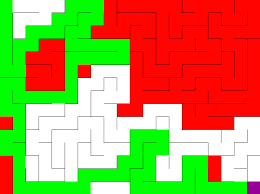

Depth first traversely is therefore recursive, like breadth first traversal we are careful that we don't repeat a vertex.

Applications of depth first traversal include edge classification, cycle detection and job scheduling via topological sort.

In [238]:
"""
An incredibly simple depth first traversal algorithm.
You can make extensions on the algorithm to make 
it more suitable for real life applications.
"""
def depth_first_traversal(aj, start_point):
    visited = []
    while len(visited) < len(aj.adjacency_list):
        depth_first_visit(visited, aj.adjacency_list, start_point)
        
    return visited
    
    
def depth_first_visit(visited, aj, vertex):
    
    visited.append(vertex)
    
    for vert in aj[vertex_map[vertex]]:
        if vert not in visited:
            depth_first_visit(visited, aj, vert)
            
depth_first_traversal(adj_list, 'A')

['A', 'H', 'F', 'J', 'G', 'D', 'C', 'E', 'B', 'I']

# That's It

Pubs are open so get yourself a pint after putting up with my waffling. Next week I aim to learn about dynamic programming and do some more graph work. Unfortunately due to the opening of pubs I am ending this weeks blog here. This week I have also learnt about path finding elements. But this and dynamic programming will be the topic of next weeks blog.

![guiness](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Guinness.jpg/170px-Guinness.jpg)

I am almost three quarters of the way through the module which I believe is good going considering MIT runs the module for an entire semester.